# Gravity
**Description:**  Gridded gravity anomaly data from various sources.

**Datasets:** 

Uieda, Leonardo. “Fatiando a Terra Data: Earth - Gravity Grid at 10 Arc-Minute Resolution.” Zenodo, January 20, 2022. https://doi.org/10.5281/zenodo.5882207.

Förste, Christoph, Sean.L. Bruinsma, Oleg Abrikosov, Jean-Michel Lemoine, Jean Charles Marty, Frank Flechtner, G. Balmino, F. Barthelmes, and R. Biancale. “EIGEN-6C4 The Latest Combined Global Gravity Field Model Including GOCE Data up to Degree and Order 2190 of GFZ Potsdam and GRGS Toulouse.” Application/octet-stream,application/octet-stream,application/zip. GFZ Data Services, 2014. https://doi.org/10.5880/ICGEM.2015.1.


In [1]:
from __future__ import annotations

%%capture
%load_ext autoreload
%autoreload 2

import os

from polartoolkit import fetch, maps, utils

os.environ["POLARTOOLKIT_HEMISPHERE"] = "north"

In [2]:
data = fetch.gravity(version="eigen").gravity
data

grdproject [WARNING]: x_inc does not divide 180; geographic boundary condition changed to natural.
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


<xarray.DataArray 'gravity' (y: 1401, x: 1401)> Size: 8MB
array([[977685.94, 977689.8 , 977693.5 , ..., 977690.94, 977688.06,
        977685.5 ],
       [977688.75, 977692.7 , 977696.5 , ..., 977693.1 , 977690.2 ,
        977687.56],
       [977690.44, 977694.44, 977698.5 , ..., 977695.6 , 977692.7 ,
        977689.9 ],
       ...,
       [977675.2 , 977678.25, 977681.44, ..., 977651.44, 977648.5 ,
        977644.8 ],
       [977673.  , 977676.1 , 977678.4 , ..., 977649.56, 977646.9 ,
        977643.25],
       [977670.1 , 977673.1 , 977675.5 , ..., 977646.94, 977644.44,
        977641.  ]], shape=(1401, 1401), dtype=float32)
Coordinates:
  * x        (x) float64 11kB -3.5e+06 -3.495e+06 ... 3.495e+06 3.5e+06
  * y        (y) float64 11kB -3.5e+06 -3.495e+06 ... 3.495e+06 3.5e+06
Attributes:
    Conventions:   CF-1.7
    actual_range:  [977641.0, 980201.9375]
    description:   
    history:       gmt grdsample @GMTAPI@-S-I-G-M-G-N-000000 -G@GMTAPI@-S-O-G...
    long_name:     z
    title:

In [3]:
utils.get_grid_info(data)

(5000.0,
 (-3500000.0, 3500000.0, -3500000.0, 3500000.0),
 977641.0,
 980201.9375,
 'g')

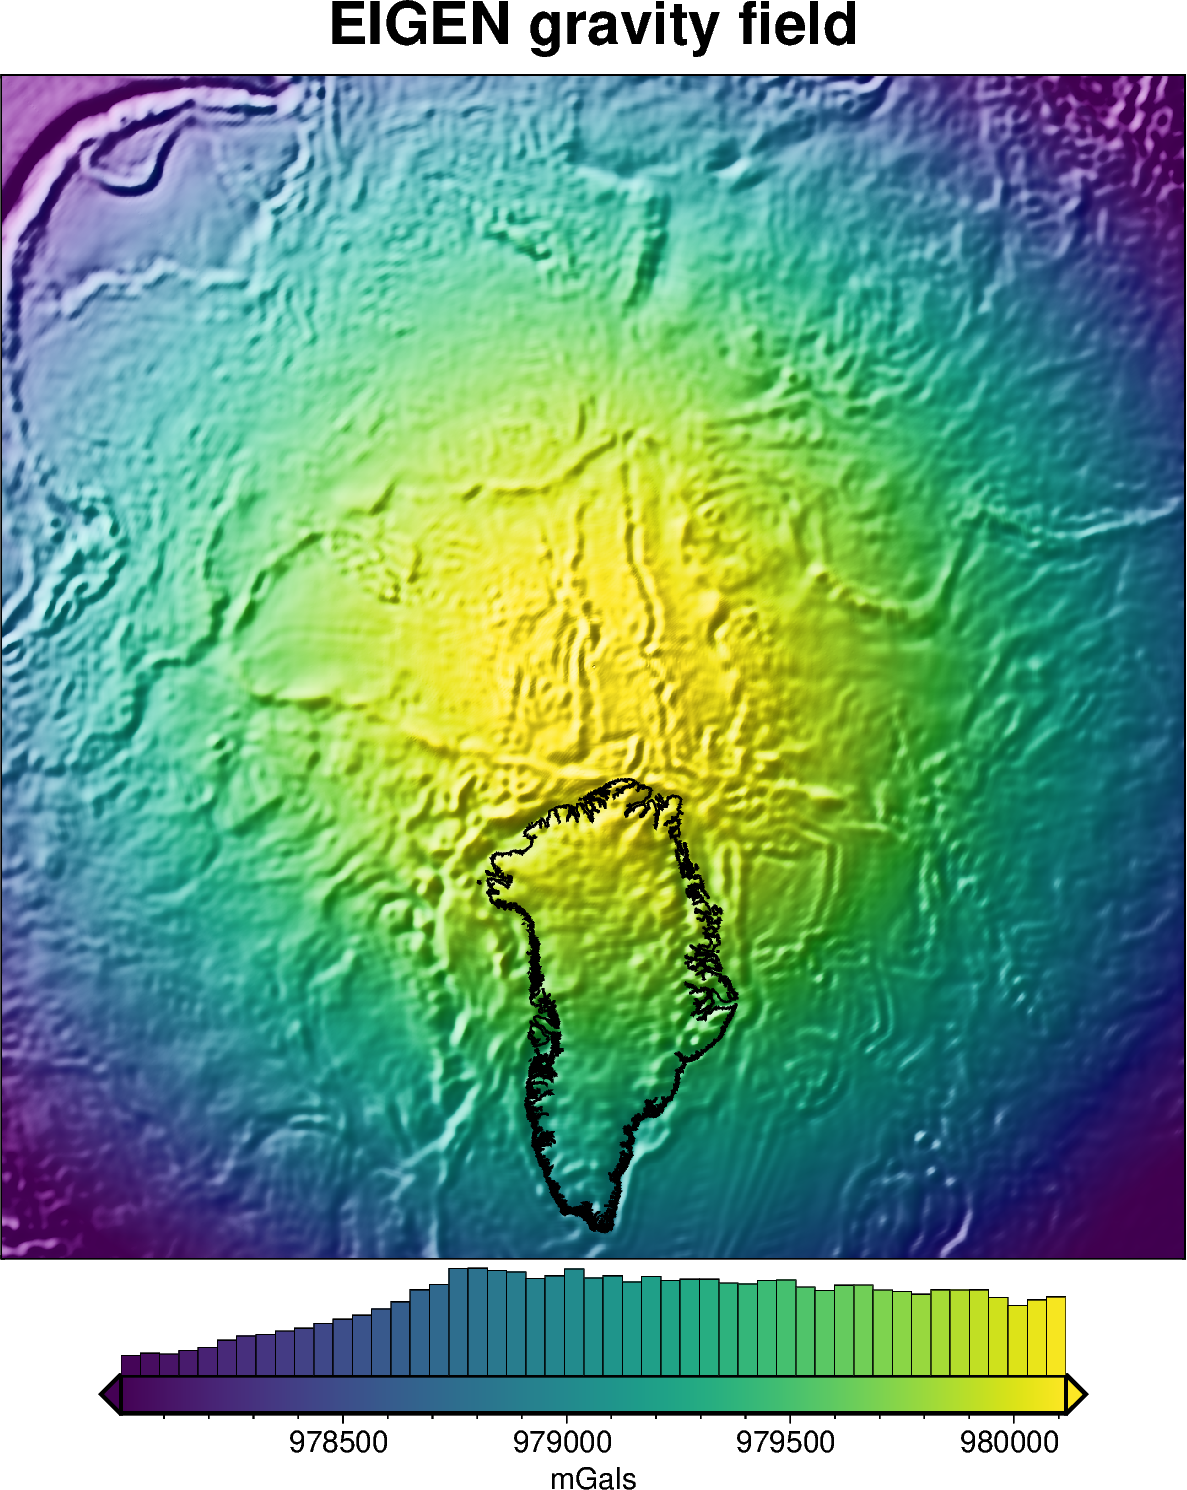

In [4]:
fig = maps.plot_grd(
    data,
    title="EIGEN gravity field",
    cbar_label="mGals",
    coast=True,
    cmap="viridis",
    hist=True,
    cbar_yoffset=1.5,
    robust=True,
    shading=True,
)
fig.show(dpi=200)